### Import Necesary Libraries & Utils

In [110]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

%run ../src/utils/dataframe_util.ipynb
%run ../src/utils/eda_util.ipynb
%run ../src/utils/transformation_util.ipynb

### Import Data Sets

In [111]:
training_df = load_datasets("../data/training_data.csv")
testing_df = load_datasets("../data/test_data.csv")

### Exploratory Data Analysis

In [112]:
training_df.head(20)

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,11/1/2021,Grocery,1.000,160.000,XYZ,16620,1475459.0
1,11/1/2021,Grocery,2.000,480.000,XYZ,32365,1475459.0
2,11/1/2021,Grocery,1.000,127.000,XYZ,31349,1475459.0
3,11/1/2021,Household,2.000,110.000,XYZ,1266,1475475.0
4,11/1/2021,Household,1.000,150.000,XYZ,114920,1475475.0
5,11/1/2021,Household,1.000,745.000,XYZ,115596,1475475.0
6,11/1/2021,Grocery,1.000,175.000,XYZ,98654,1475475.0
7,11/1/2021,Grocery,3.000,120.000,XYZ,8373,1475475.0
8,11/1/2021,Grocery,1.000,194.000,XYZ,106669,1475521.0
9,11/1/2021,Household,1.000,137.000,XYZ,75008,1475521.0


In [113]:
testing_df.head()

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,2/1/2022,Beverages,2.0,480.0,XYZ,112360,1495518.0
1,2/1/2022,Beverages,1.0,202.0,XYZ,111195,1495518.0
2,2/1/2022,Household,1.0,165.0,XYZ,41212,1495572.0
3,2/1/2022,Household,2.0,480.0,XYZ,123476,1495572.0
4,2/1/2022,Grocery,2.0,660.0,XYZ,106668,1495572.0


In [114]:
# Analyse of training data
training_df.describe()

,item_qty,net_sales,item,invoice_num
count,614098.000000,614098.000000,614098.00000,5.912880e+05
mean,1.533792,335.067969,67622.41479,4.231954e+06
std,3.058092,824.733169,48909.65677,1.704178e+06
min,-59.000000,-15250.000000,906.00000,1.475419e+06
25%,1.000000,124.000000,14340.00000,2.581947e+06
50%,1.000000,215.000000,89725.00000,4.597865e+06
75%,1.668000,371.000000,117021.00000,5.598286e+06
max,880.000000,316880.280000,124146.00000,9.354809e+06


In [115]:
# Analyse of testing data
testing_df.describe()

,item_qty,net_sales,item,invoice_num
count,247624.000000,247624.000000,247624.000000,2.393190e+05
mean,1.483270,337.917961,67301.092705,4.216961e+06
std,3.338285,1098.152325,48872.700575,1.723722e+06
min,-15.000000,-6400.000000,906.000000,1.495460e+06
25%,1.000000,130.000000,14544.000000,2.591172e+06
50%,1.000000,220.000000,84631.000000,4.614483e+06
75%,1.002000,390.000000,116935.000000,5.608592e+06
max,1200.000000,492000.000000,124233.000000,9.366931e+06


In [116]:
# Remove item column from both data sets
training_cleaned = training_df.drop(columns=('item'))
training_cleaned.head()

test_cleaned = testing_df.drop(columns=('item'))
test_cleaned.head()

,date_id,item_dept,item_qty,net_sales,store,invoice_num
0,2/1/2022,Beverages,2.0,480.0,XYZ,1495518.0
1,2/1/2022,Beverages,1.0,202.0,XYZ,1495518.0
2,2/1/2022,Household,1.0,165.0,XYZ,1495572.0
3,2/1/2022,Household,2.0,480.0,XYZ,1495572.0
4,2/1/2022,Grocery,2.0,660.0,XYZ,1495572.0


In [117]:
# Check data types of training data
training_cleaned.dtypes

date_id         object
item_dept       object
item_qty       float64
net_sales      float64
store           object
invoice_num    float64
dtype: object

In [118]:
# Check data types of testing data
test_cleaned.dtypes

date_id         object
item_dept       object
item_qty       float64
net_sales      float64
store           object
invoice_num    float64
dtype: object

In [119]:
# Check null values
print_null_summary(training_cleaned, "training")
print_null_summary(test_cleaned, "testing")

Null values in training:
+-------------+---------------+----------+
| Column      |   Null Values |   Out of |
|-------------+---------------+----------|
| invoice_num |         22810 |   614098 |
+-------------+---------------+----------+

Null values in testing:
+-------------+---------------+----------+
| Column      |   Null Values |   Out of |
|-------------+---------------+----------|
| invoice_num |          8305 |   247624 |
+-------------+---------------+----------+



In [120]:
# Remove null records from training data set
training_cleaned = training_cleaned.dropna(subset=['invoice_num'])
training_cleaned.head()

,date_id,item_dept,item_qty,net_sales,store,invoice_num
0,11/1/2021,Grocery,1.0,160.0,XYZ,1475459.0
1,11/1/2021,Grocery,2.0,480.0,XYZ,1475459.0
2,11/1/2021,Grocery,1.0,127.0,XYZ,1475459.0
3,11/1/2021,Household,2.0,110.0,XYZ,1475475.0
4,11/1/2021,Household,1.0,150.0,XYZ,1475475.0


In [121]:
# Remove null records from testing data set
test_cleaned = test_cleaned.dropna(subset=['invoice_num'])
test_cleaned.head()

,date_id,item_dept,item_qty,net_sales,store,invoice_num
0,2/1/2022,Beverages,2.0,480.0,XYZ,1495518.0
1,2/1/2022,Beverages,1.0,202.0,XYZ,1495518.0
2,2/1/2022,Household,1.0,165.0,XYZ,1495572.0
3,2/1/2022,Household,2.0,480.0,XYZ,1495572.0
4,2/1/2022,Grocery,2.0,660.0,XYZ,1495572.0


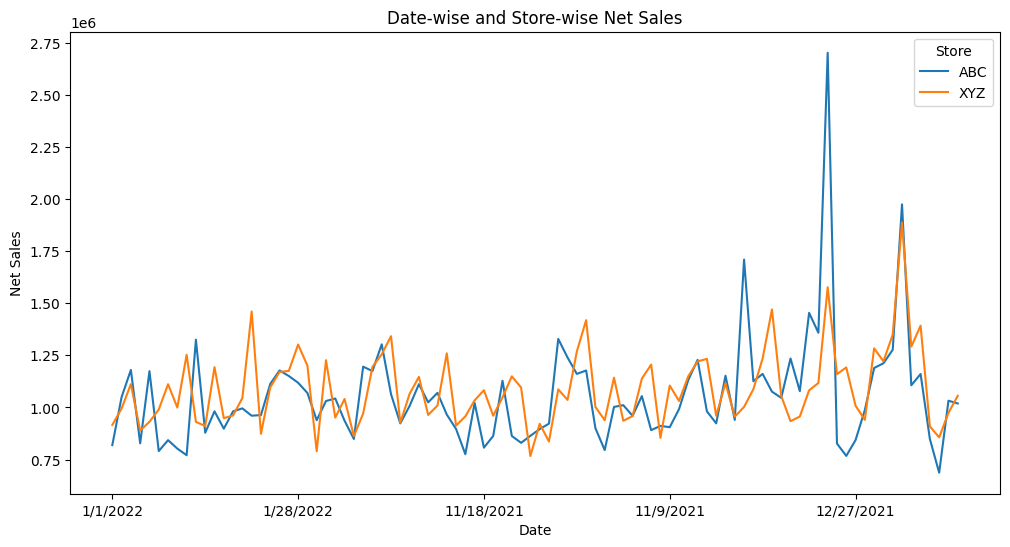

In [122]:
grouped_df = training_cleaned.groupby(['date_id', 'store'])['net_sales'].sum().reset_index()
pivot_df = grouped_df.pivot(index='date_id', columns='store', values='net_sales')
pivot_df.plot(figsize=(12, 6))
plt.title('Date-wise and Store-wise Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.legend(title='Store')
plt.show()

In [123]:
training_cleaned.head(20)

,date_id,item_dept,item_qty,net_sales,store,invoice_num
0,11/1/2021,Grocery,1.000,160.000,XYZ,1475459.0
1,11/1/2021,Grocery,2.000,480.000,XYZ,1475459.0
2,11/1/2021,Grocery,1.000,127.000,XYZ,1475459.0
3,11/1/2021,Household,2.000,110.000,XYZ,1475475.0
4,11/1/2021,Household,1.000,150.000,XYZ,1475475.0
5,11/1/2021,Household,1.000,745.000,XYZ,1475475.0
6,11/1/2021,Grocery,1.000,175.000,XYZ,1475475.0
7,11/1/2021,Grocery,3.000,120.000,XYZ,1475475.0
8,11/1/2021,Grocery,1.000,194.000,XYZ,1475521.0
9,11/1/2021,Household,1.000,137.000,XYZ,1475521.0


### Data Transformation

In [124]:
training_cleaned['date_id'] = pd.to_datetime(training_cleaned['date_id'])
training_cleaned = training_cleaned.groupby(['date_id', 'item_dept', 'store'])[['item_qty', 'net_sales']].sum().reset_index()
training_cleaned.head(20)

,date_id,item_dept,store,item_qty,net_sales
0,2021-11-01,Beverages,ABC,889.000,251565.799010
1,2021-11-01,Beverages,XYZ,779.000,187931.769020
2,2021-11-01,Grocery,ABC,2297.399,427802.624020
3,2021-11-01,Grocery,XYZ,2986.060,491190.723000
4,2021-11-01,Household,ABC,1026.000,244206.266010
5,2021-11-01,Household,XYZ,1124.000,247156.009988
6,2021-11-02,Beverages,ABC,1122.000,272869.838000
7,2021-11-02,Beverages,XYZ,870.000,240795.000000
8,2021-11-02,Grocery,ABC,2960.384,571580.092985
9,2021-11-02,Grocery,XYZ,3461.804,557900.469012


In [125]:
test_cleaned['date_id'] = pd.to_datetime(test_cleaned['date_id'])
test_cleaned = test_cleaned.groupby(['date_id', 'item_dept', 'store'])[['item_qty', 'net_sales']].sum().reset_index()
test_cleaned.head(20)

,date_id,item_dept,store,item_qty,net_sales
0,2022-02-01,Beverages,ABC,1621.000,421897.829100
1,2022-02-01,Beverages,XYZ,1093.000,252335.034010
2,2022-02-01,Grocery,ABC,3402.912,708372.069996
3,2022-02-01,Grocery,XYZ,3828.502,705860.778006
4,2022-02-01,Household,ABC,1301.000,349035.000000
5,2022-02-01,Household,XYZ,1229.000,314019.403990
6,2022-02-02,Beverages,ABC,1573.000,432788.459000
7,2022-02-02,Beverages,XYZ,1359.000,362332.474000
8,2022-02-02,Grocery,ABC,3128.257,607100.876996
9,2022-02-02,Grocery,XYZ,4068.452,761142.989004


In [126]:
training_model_data = create_lag_values(training_cleaned)
print(training_model_data)

       date_id  item_dept store  item_qty     net_sales  item_qty_lag_1  \
0   2021-11-01  Beverages   ABC   889.000  251565.79901     1641.933704   
1   2021-11-01  Beverages   XYZ   779.000  187931.76902      889.000000   
2   2021-11-01    Grocery   ABC  2297.399  427802.62402      779.000000   
3   2021-11-01    Grocery   XYZ  2986.060  491190.72300     2297.399000   
4   2021-11-01  Household   ABC  1026.000  244206.26601     2986.060000   
..         ...        ...   ...       ...           ...             ...   
547 2022-01-31  Beverages   XYZ   746.000  169055.35500      845.000000   
548 2022-01-31    Grocery   ABC  2565.874  535434.93100      746.000000   
549 2022-01-31    Grocery   XYZ  2867.921  527781.39400     2565.874000   
550 2022-01-31  Household   ABC  1099.000  310472.26999     2867.921000   
551 2022-01-31  Household   XYZ  1095.000  254613.67500     1099.000000   

     net_sales_lag_1  item_qty_lag_2  net_sales_lag_2  item_qty_lag_3  \
0      357067.186567     1

In [127]:
testing_model_data = create_lag_values(test_cleaned)
print(testing_model_data)

       date_id  item_dept store  item_qty      net_sales  item_qty_lag_1  \
0   2022-02-01  Beverages   ABC  1621.000  421897.829100     2112.490665   
1   2022-02-01  Beverages   XYZ  1093.000  252335.034010     1621.000000   
2   2022-02-01    Grocery   ABC  3402.912  708372.069996     1093.000000   
3   2022-02-01    Grocery   XYZ  3828.502  705860.778006     3402.912000   
4   2022-02-01  Household   ABC  1301.000  349035.000000     3828.502000   
..         ...        ...   ...       ...            ...             ...   
163 2022-02-28  Beverages   XYZ  1197.000  288477.902984     1407.000000   
164 2022-02-28    Grocery   ABC  3397.800  678069.636867     1197.000000   
165 2022-02-28    Grocery   XYZ  4679.518  911730.192008     3397.800000   
166 2022-02-28  Household   ABC  1445.000  375793.614974     4679.518000   
167 2022-02-28  Household   XYZ  1611.000  391061.073959     1445.000000   

     net_sales_lag_1  item_qty_lag_2  net_sales_lag_2  item_qty_lag_3  \
0      480085.